In [1]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=830e369da7db70e75f82f7a2f6768f5b0e128c6e7d33d0b5c52f5ffc40f5288e
  Stored in directory: /root/.cache/pip/wheels/e2/a5/92/2c80d1928733611c2747a9820e1324a6835524d9411510c142
Successfully built seqeval


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from keras.utils.np_utils import to_categorical
from joblib import dump, load

In [96]:
text = []
clas = []
df = pd.read_csv('/content/drive/MyDrive/Hindi AD/new_Manual_dataset.csv',dtype = "str")
df


,text,google_translated_text,mbart50_m2m,m2m_100_1.2B,opus-mt,Result,Labels,manual_trans
0,the scene is in the kitchen.the mother is wipi...,दृश्य रसोई में है। माँ व्यंजन पोंछ रही है और प...,दृश्य रसोई में है। मां बर्तन धो रही है और पानी...,दृश्य रसोईघर में है. माँ डिश धो रही है और पानी...,यह दृश्‍य किचिन में है । एक लड़का एक घड़े से क...,Control,0,दृश्य रसोई की है। माँ बर्तन पोंछ रही है और पान...
1,oh i see the sink is running over . i see the ...,"ओह, मुझे लगता है कि सिंक खत्म हो रहा है। मुझे ...",ओह मैं देखता हूँ सिंक ऊपर चल रहा है। मैं देखता...,मैं देखता हूं कि सिंहासन चल रहा है। मैं देखता ...,ओह मैं सिंक खत्म हो रहा है देखते हैं. मुझे लगत...,Control,0,"ओह, मैं देख रहा हूँ कि सिंक बह निकला है।मैं दे..."
2,a boy and a girl are in the kitchen with their...,एक लड़का और एक लड़की अपनी माँ के साथ रसोई में ...,एक लड़का और एक लड़की मां के साथ रसोईघर में हैं...,एक लड़का और एक लड़की अपनी मां के साथ रसोई में ...,एक लड़का और लड़की रसोई में अपनी माँ के साथ हैं...,Control,0,एक लड़का और एक लड़की रसोई में अपनी माँ के साथ ...
3,okay . it was summertime and mother and the ch...,ठीक है । यह गर्मियों में था और माँ और बच्चे रस...,ठीक है। यह गर्मी का समय था और माँ और बच्चे रसो...,ठीक है। यह गर्मियों का समय था और माँ और बच्चे ...,ठीक है. गर्मियों का मौसम था और माँ और बच्चे रस...,Control,0,गर्मी का मौसम था और माँ और बच्चे रसोई में काम ...
4,wait until i put my glasses on . oh there's a ...,तब तक रुको जब तक मैं अपना चश्मा नहीं डालता। ओह...,जब तक मैं अपने चश्मा लगाएं तक प्रतीक्षा करें। ...,तब तक इंतज़ार करें जब तक मैं अपने चश्मा पहनता ...,"मैं पर मेरे चश्मा डाल जब तक इंतजार करें. ओह, ए...",Control,0,जब तक मैं अपना चश्मा नहीं लगाता तब तक प्रतीक्ष...
...,...,...,...,...,...,...,...,...
543,well the little kid's falling off his stool . ...,खैर छोटा बच्चा अपने स्टूल से गिर रहा है। और मा...,"ठीक है, छोटा बच्चा अपनी कुर्सी से गिर रहा है। ...",छोटा बच्चा अपने कुर्सी से गिर रहा है। माँ के प...,छोटा बच्चा अपनी चौकी से गिर रहा है. और वह (बस्...,Dementia,1,अच्छ छोटा बच्चा अपने मल से गिर रहा है। और माँ ...
544,mhm . well this one is in the cookie jar . and...,एमएचएम। खैर यह एक कुकी जार में है। और उसने चढ़...,mhm। यह एक कुकी के बर्तन में है। और वो चढ़ने क...,एमएम यह एक कुकी जार में है। और वह चढ़ने की कोश...,mh. अच्छी तरह से इस आदमी कुकी जार में है. और व...,Dementia,1,महम। अच्छा यह कुकी जार में है। और उसने चढ़ने क...
545,hm the little boy is on the stool which is ti...,एचएम छोटा लड़का स्टूल पर है जो टिपिंग कर रहा ह...,"हां, छोटा लड़का स्टूल पर है जो झुक रहा है और व...","हाँ, छोटा लड़का कुर्सी पर है जो टिपिंग कर रहा ...",छोटे लड़के को उस चौकी पर है जिस पर सरकना है और...,Dementia,1,हम्म छोटा लड़का स्टूल पर है जो ढो रहा है और वह...
546,oh you want me to tell you . the mother and he...,"ओह, आप चाहते हैं कि मैं आपको बताऊं। माँ और उसक...",ओह तुम चाहते हो कि मैं तुम्हें बता दूँ। मां और...,आप चाहते हैं कि मैं आपको बताऊं। मां और उसके दो...,ओह तुम मुझे तुम्हें बताने के लिए चाहते हैं. मा...,Dementia,1,"ओह, आप चाहते हैं कि मैं आपको बता दूं। माँ और उ..."


In [97]:
text = df['mbart50_m2m'].tolist()
clas = df['Labels'].tolist()

df = pd.DataFrame({'tweet': text, 'class': clas})

In [98]:
df

,tweet,class
0,दृश्य रसोई में है। मां बर्तन धो रही है और पानी...,0
1,ओह मैं देखता हूँ सिंक ऊपर चल रहा है। मैं देखता...,0
2,एक लड़का और एक लड़की मां के साथ रसोईघर में हैं...,0
3,ठीक है। यह गर्मी का समय था और माँ और बच्चे रसो...,0
4,जब तक मैं अपने चश्मा लगाएं तक प्रतीक्षा करें। ...,0
...,...,...
543,"ठीक है, छोटा बच्चा अपनी कुर्सी से गिर रहा है। ...",1
544,mhm। यह एक कुकी के बर्तन में है। और वो चढ़ने क...,1
545,"हां, छोटा लड़का स्टूल पर है जो झुक रहा है और व...",1
546,ओह तुम चाहते हो कि मैं तुम्हें बता दूँ। मां और...,1


# text cleaning

In [99]:
df['tweet'] = df[['tweet']].apply(lambda x: x.str.strip()).replace('', np.nan)
df = df.dropna(subset=['tweet'])
df.reset_index(drop=True, inplace=True)

In [100]:
df['tweet'] = df['tweet'].apply(lambda x:x.lower())

In [101]:
punctuation_signs = list("?:!.,;|।")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:   
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

<ipython-input-101-58185447e27a>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['tweet'] = df['tweet'].str.replace(punct_sign, '')


In [102]:
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('।', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

In [103]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-103-969333b8111c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(regex_stopword, '')


In [104]:
import re
Tweet = []
for tweettext in df["tweet"]:
  text = re.sub(r"http\S+", "", tweettext)
  text = re.sub(r"@\S+"," ",text)
  emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002500-\U00002BEF"  # chinese char
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"  # dingbats
                            u"\u3030"
                            "]+", flags=re.UNICODE)

  text = emoji_pattern.sub('',text)
  text = text.replace("#","")
  text = text.replace("|","")
  text = text.replace('\n',"")
  text = text.replace('!',"")
  text = re.sub("\xa0|©|\xad|⏬|\u200b|\u200c|–|—|‘|’|“|”|•|…|\u202f|‼|⁉|\u2066|ఎ|క|గ|చ|జ|ట|డ|త|న|ప|బ|మ|య|ర|ల|ష|స|హ|ਅ|ਆ|ਇ|ਈ|ਊ|ਓ|ਕ|ਗ|ਚ|ਜ|ਝ|ਟ|ਠ|ਡ|ਤ|ਦ|ਨ|ਪ|ਬ|ਮ|ਰ|ਲ|ਵ|ਸ|ਹ|લ|સ|હ","",text)
  text = re.sub("$|%|&|(|)|-|/|=|@|[|]|_|{|}|~|","",text)
  text = text.replace("+","")
#   text = re.sub(r'\b\d\w*\b', '', text)
#   text = re.sub('[^A-Za-z0-9]+', ' ', text)
#   print(text)
  Tweet.append(text)

In [105]:

corpus = ""
for i in Tweet:
    corpus = corpus + ' ' + i 
letters = set(corpus)

In [106]:
len(list(letters))

102

In [107]:
df["tweet"] = Tweet
df

,tweet,class
0,दृश्य रसोई में है मां बर्तन धो रही है और पानी ...,0
1,ओह मैं देखता हूँ सिंक ऊपर चल रहा है मैं देखता ...,0
2,एक लड़का और एक लड़की मां के साथ रसोईघर में हैं...,0
3,ठीक है यह गर्मी का समय था और माँ और बच्चे रसोई...,0
4,जब तक मैं अपने चश्मा लगाएं तक प्रतीक्षा करें ओ...,0
...,...,...
543,ठीक है छोटा बच्चा अपनी कुर्सी से गिर रहा है और...,1
544,mhm यह एक कुकी के बर्तन में है और वो चढ़ने की ...,1
545,हां छोटा लड़का स्टूल पर है जो झुक रहा है और वह...,1
546,ओह तुम चाहते हो कि मैं तुम्हें बता दूँ मां और ...,1


# ML models

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['tweet']).toarray()
y = df['class'].map(int)

In [109]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [110]:
# cv = CountVectorizer()
# X = cv.fit_transform(df['tweet']).toarray()
# y = df['class'].map(int)

In [111]:
metrics_df = pd.DataFrame(index = ["mae macro average","precision macro average", "recall macro average ", "f1 score marco average", "classification_report"])

In [112]:
metrics_df

""
mae macro average
precision macro average
recall macro average
f1 score marco average
classification_report


imbalance upscale


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)

In [114]:
# from imblearn.over_sampling import SMOTE, ADASYN
# X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [115]:
from imblearn.metrics import macro_averaged_mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
def metrics_print(y_pred, y_test,model,df):


    
    mae = macro_averaged_mean_absolute_error(y_pred, y_test)
    y_pred = y_pred.astype('str')
    y_test =y_test.map(str)
    y_test = y_test.values
    precision = precision_score(y_pred, y_test,average = 'macro')
    recall = recall_score(y_pred, y_test,average = 'macro')
    class_rep = classification_report(y_pred, y_test)
    f1 = f1_score(y_pred, y_test,average = 'macro')
    
    print("Mean Absoulte error", mae)
    print("precision score",precision)
    print("recall score",recall)
    print("classification report")
    print("F1 Score",f1)
    print(class_rep)
    df[model] = [mae,precision, recall,f1,class_rep]
    return df

def plot_confusion_matrix(cm,y_test,y_pred,model,df,classes,
                                            normalize=False,
                                            title='Confusion matrix',
                                                cmap=plt.cm.Blues):
    
    df = metrics_print(y_pred,y_test,model,df)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return df

accuracy is:  0.6545454545454545
Mean Absoulte error 0.34395478374836175
precision score 0.6411111111111111
recall score 0.6560452162516383
classification report
F1 Score 0.639226667689593
              precision    recall  f1-score   support

           0       0.49      0.66      0.56        56
           1       0.79      0.65      0.71       109

    accuracy                           0.65       165
   macro avg       0.64      0.66      0.64       165
weighted avg       0.69      0.65      0.66       165



['rf.joblib']

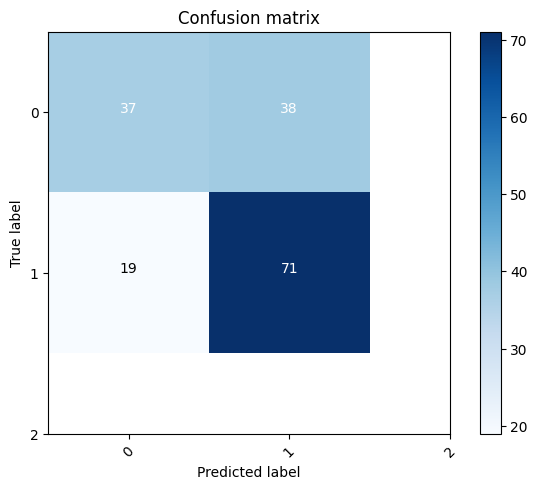

In [116]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)

metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Random Forest",metrics_df,classes = range(3))
dump(clf, 'rf.joblib') 

accuracy is:  0.6666666666666666
Mean Absoulte error 0.3333333333333333
precision score 0.6555555555555556
recall score 0.6666666666666666
classification report
F1 Score 0.6552706552706553
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        60
           1       0.78      0.67      0.72       105

    accuracy                           0.67       165
   macro avg       0.66      0.67      0.66       165
weighted avg       0.69      0.67      0.67       165



['decision.joblib']

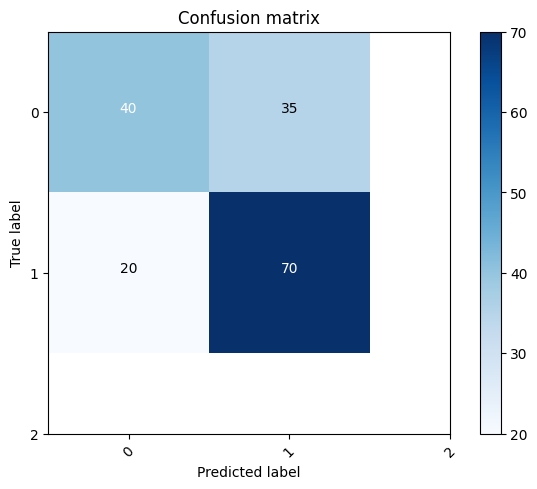

In [117]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Decision Tree",metrics_df,classes = range(3))
dump(clf, 'decision.joblib') 

accuracy is:  0.5515151515151515
Mean Absoulte error 0.4603174603174603
precision score 0.5177777777777778
recall score 0.5396825396825398
classification report
F1 Score 0.45646367521367526
              precision    recall  f1-score   support

           0       0.15      0.52      0.23        21
           1       0.89      0.56      0.68       144

    accuracy                           0.55       165
   macro avg       0.52      0.54      0.46       165
weighted avg       0.79      0.55      0.63       165



['GaussianNaiveBayes.joblib']

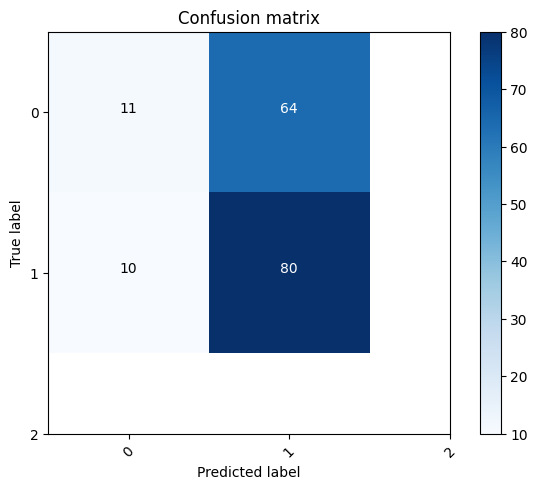

In [118]:
from sklearn.naive_bayes import MultinomialNB
gau = MultinomialNB()
gau = gau.fit(X_train, y_train)
y_pred = gau.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Multi-Nomial Naive Bayes",metrics_df,classes = range(3))
dump(gau, 'GaussianNaiveBayes.joblib') 

accuracy is:  0.6484848484848484
Mean Absoulte error 0.3534047919293821
precision score 0.6377777777777778
recall score 0.6465952080706179
classification report
F1 Score 0.6372801697998788
              precision    recall  f1-score   support

           0       0.52      0.64      0.57        61
           1       0.76      0.65      0.70       104

    accuracy                           0.65       165
   macro avg       0.64      0.65      0.64       165
weighted avg       0.67      0.65      0.65       165



['SVM.joblib']

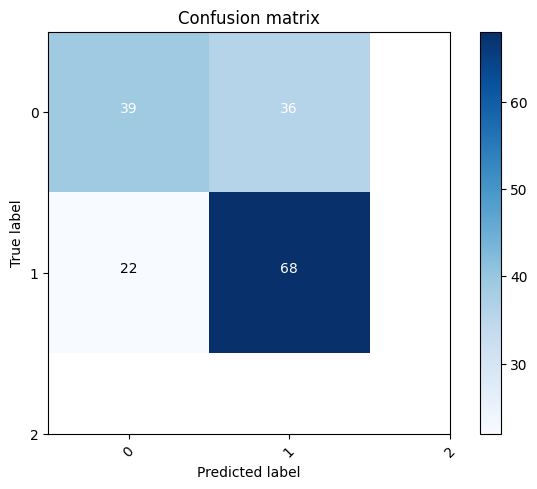

In [119]:
from sklearn.svm import SVC
svm = SVC(max_iter = 1000)
svm = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"SVC",metrics_df,classes = range(3))
dump(svm, 'SVM.joblib') 

accuracy is:  0.6545454545454545
Mean Absoulte error 0.34395478374836175
precision score 0.6411111111111111
recall score 0.6560452162516383
classification report
F1 Score 0.639226667689593
              precision    recall  f1-score   support

           0       0.49      0.66      0.56        56
           1       0.79      0.65      0.71       109

    accuracy                           0.65       165
   macro avg       0.64      0.66      0.64       165
weighted avg       0.69      0.65      0.66       165



['LogisticRegression.joblib']

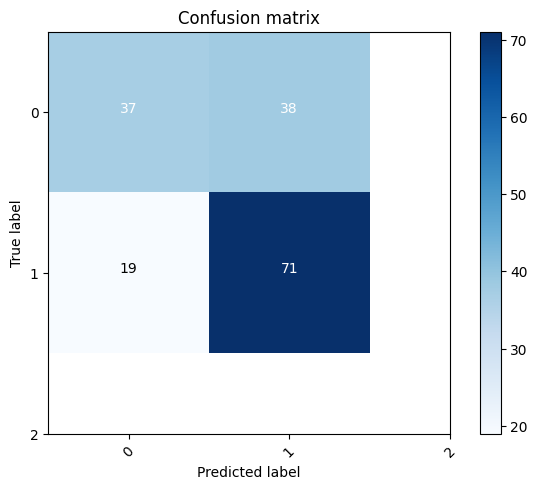

In [120]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(max_iter = 1000)
logi = logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Logistic Regression",metrics_df,classes = range(3))
dump(logi, 'LogisticRegression.joblib') 

accuracy is:  0.696969696969697
Mean Absoulte error 0.30275443510737626
precision score 0.6877777777777778
recall score 0.6972455648926237
classification report
F1 Score 0.6886322463768116
              precision    recall  f1-score   support

           0       0.59      0.70      0.64        63
           1       0.79      0.70      0.74       102

    accuracy                           0.70       165
   macro avg       0.69      0.70      0.69       165
weighted avg       0.71      0.70      0.70       165



['ADA.joblib']

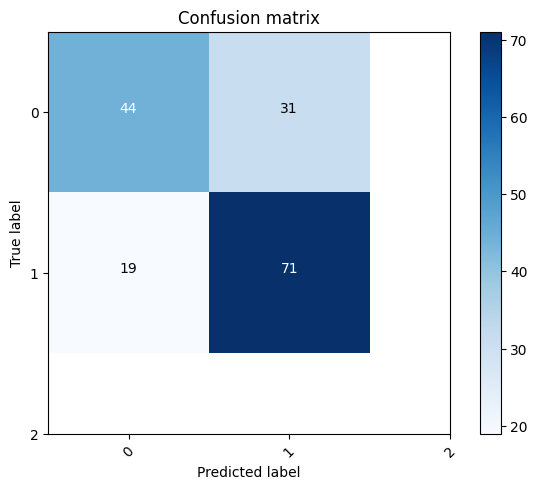

In [121]:
from sklearn.ensemble import  AdaBoostClassifier

logi = AdaBoostClassifier(random_state=42, n_estimators=300)
logi = logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"ADA",metrics_df,classes = range(3))
dump(logi, 'ADA.joblib') 

accuracy is:  0.6909090909090909
Mean Absoulte error 0.3097153465346535
precision score 0.6822222222222223
recall score 0.6902846534653465
classification report
F1 Score 0.6830389091867866
              precision    recall  f1-score   support

           0       0.59      0.69      0.63        64
           1       0.78      0.69      0.73       101

    accuracy                           0.69       165
   macro avg       0.68      0.69      0.68       165
weighted avg       0.70      0.69      0.69       165



['XGB.joblib']

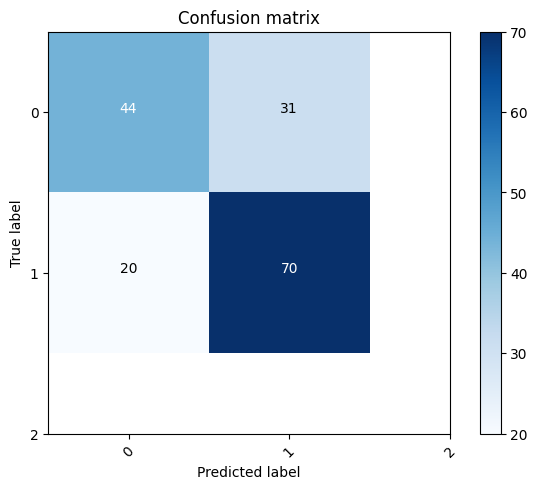

In [122]:
from xgboost import XGBClassifier
logi = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7, n_estimators=300)
logi = logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"XGB",metrics_df,classes = range(3))
dump(logi, 'XGB.joblib') 



In [124]:
metrics_df #mbart50_m2m

,Random Forest,Decision Tree,Multi-Nomial Naive Bayes,SVC,Logistic Regression,ADA,XGB
mae macro average,0.343955,0.333333,0.460317,0.353405,0.343955,0.302754,0.309715
precision macro average,0.641111,0.655556,0.517778,0.637778,0.641111,0.687778,0.682222
recall macro average,0.656045,0.666667,0.539683,0.646595,0.656045,0.697246,0.690285
f1 score marco average,0.639227,0.655271,0.456464,0.63728,0.639227,0.688632,0.683039
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


In [ ]:
metrics_df #old-smote

,Random Forest,Decision Tree,Multi-Nomial Naive Bayes,SVC,Logistic Regression
mae macro average,0.249073,0.372106,0.296537,0.267857,0.267136
precision macro average,0.751471,0.628251,0.703715,0.73243,0.730341
recall macro average,0.750927,0.627894,0.703463,0.732143,0.732864
f1 score marco average,0.751082,0.6272,0.701852,0.732258,0.730884
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...
